In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
import re
import string
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import mean_squared_error


In [2]:

from afinn import Afinn
afinn = Afinn()


In [3]:
df = pd.read_csv('/Users/varsha/.spyder-py3/McCaskill.csv')

df.head(3)

,tweet,Created-At,From-User,Retweet-Count,Account,Id
0,NashvilleResist - Help With #MSSen #FLSen #GAG...,2018-10-23 16:11:02,Nashville Resist ??????️‍????????????????,7.0,McCaskill,1.054828e+18
1,Kim Miller on Twitter: &quot;If these people d...,2018-10-23 16:00:41,Kim Miller,0.0,McCaskill,1.054825e+18
2,NRA on Twitter: &quot;.@McCaskill4MO&#39;s eff...,2018-10-21 12:00:01,NRA,1388.0,McCaskill,1.054040e+18


In [4]:
# Sentiment analysis with AFINN
afinn = Afinn(emoticons=True)
afinn_scores = [afinn.score(text) for text in df.tweet]
df['afinn'] = afinn_scores


In [5]:

#compute sentiment scores (polarity) and labels
sentiment_scores = [afinn.score(text) for text in df.tweet]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]


In [6]:
df1 = pd.DataFrame([list(df['tweet']), sentiment_scores, sentiment_category]).T
df1.columns = ['tweet', 'sentiment_scores', 'sentiment_category']
df1['sentiment_scores'] = df1.sentiment_scores.astype('float')
df1.groupby(by=['tweet']).describe()


sentiment_scores        \
                                                              count  mean   
tweet                                                                       
#NeverForgetVeterans on Twitter: &quot;⁦@claire...              1.0  -4.0   
#TrumpNationalist on Twitter: &quot;They only e...              1.0   2.0   
10 Minutes a Day #WaveCast ?? ??️‍?? on Twitter...              1.0   0.0   
10 Minutes a Day #WaveCast ?? ??️‍?? on Twitter...              1.0   0.0   
10 Minutes a Day #WaveCast ?? ??️‍?? on Twitter...              1.0   0.0   
??   ???? ??✌?????? on Twitter: &quot;Hawley is...              1.0  -3.0   
?? Donate Blood ?? on Twitter: &quot;?? were th...              1.0   2.0   
?? Donate Blood ?? on Twitter: &quot;Here are s...              1.0   2.0   
?? Donate Blood ?? on Twitter: &quot;Here are s...              1.0   2.0   
?? Donate Blood ?? on Twitter: &quot;We don’t w...              1.0   3.0   
?? RightLeaningMom?? on Twitter: &quot;LOL ????...              1.0   8.0   
???? Deplorable Gardener ???? on Twitter: &quot...              1.0  -2.0   
????????????????????????42 on Twitter: &quot;Ha...              1.0  15.0   
????????????????????????42 on Twitter: &quot;No...              1.0  -1.0   
????????????????????????42 on Twitter: &quot;No...              1.0  -4.0   
????????????????????????42 on Twitter: &quot;Ri...              1.0   1.0   
????????????????????????42 on Twitter: &quot;Ta...              1.0   0.0   
????Spen ???????? on Twitter: &quot;#Missouri w...              1.0  -2.0   
????Spen ???????? on Twitter: &quot;@PhilBredes...              1.0  -5.0   
????TIQ TOQ❤️TRISH???? on Twitter: &quot;What e...              1.0  -2.0   
??BouffantBecky?? on Twitter: &quot;Who&#39;s t...              1.0   0.0   
??Nov. 6th was the beginning?? on Twitter: &quo...              1.0   0.0   
??☒??~SusieQ~?????? on Twitter: &quot;Thank you...              1.0   2.0   
??️‍??Lisa Talmadge ?? on Twitter: &quot;Wow I ...              1.0   6.0   
@10MinutesaDay4U: FBR for those trying to flip ...             20.0   0.0   
@1hippoallalone: @McCaskill4MO @JolineAbba @cla...              1.0   2.0   
@7munkee @McCaskill4MO Oh...you mean the #Pizza...              1.0   0.0   
@90bristolcourt @McCaskill4MO Look who is doubl...              1.0   0.0   
@ATNorth2: @NRA @McCaskill4MO It would help if ...              1.0   2.0   
@AllCharisma: #missouri Get a Senator on the si...              1.0   0.0   
...                                                             ...   ...   
Yanasteel on Twitter: &quot;⁦@clairecmc⁩ ⁦@McCa...              1.0  -3.0   
Yanasteel on Twitter: &quot;⁦⁦@clairecmc⁩ ⁦@McC...              1.0   0.0   
Yazzito on Twitter: &quot;Claire McCaskill caug...              1.0   0.0   
Your Highness on Twitter: &quot;Why? Does she w...              1.0  -1.0   
Zack K on Twitter: &quot;Huh? Hawley isn&#39;t ...              1.0  -4.0   
anna sturdefant on Twitter: &quot;My Family has...              1.0  -3.0   
beachfront demon on Twitter: &quot;You describe...              1.0  -2.0   
cmdorsey⭐⭐⭐ #BENGHAZI on Twitter: &quot;cc: @Mc...              1.0 -14.0   
crikitRN on Twitter: &quot;My husband and I hav...              1.0   7.0   
jimkhm on Twitter: &quot;@McCaskill4MO @clairec...              1.0  -1.0   
jncramb on Twitter: &quot;As far as messaging g...              1.0   0.0   
jncramb on Twitter: &quot;Temporary one party r...              1.0  -1.0   
jncramb on Twitter: &quot;Voter suppression? In...              1.0  -5.0   
jncramb on Twitter: &quot;When it comes to judg...              1.0  -2.0   
kelly young on Twitter: &quot;Just like her fak...              1.0   2.0   
piewhackett on Twitter: &quot;PA2:     @McCaski...              1.0   0.0   
randy lee on Twitter: &quot;@McCaskill4MO @clai...              1.0   1.0   
randy lee on Twitter: &quot;@clairecmc @McCaski...              1.0  -2.0   
rememberruss on Twitter: &quot;You got to be ki

In [7]:

#function for tokenizing summary
regEx = re.compile('[^a-z]+')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText

cluster = df1.groupby("sentiment_scores")["tweet"].apply(list)
cluster = pd.DataFrame(cluster)
cluster.to_csv("cluster.csv")
cluster1 = pd.read_csv("cluster.csv")
cluster1["TextClean"] = cluster1["tweet"].apply(cleanReviews)



In [8]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


In [9]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords = stopwords,
        max_words=500,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
        

In [10]:
df1["sentiment_category"].describe()

count         2553
unique           3
top       positive
freq          1027
Name: sentiment_category, dtype: object

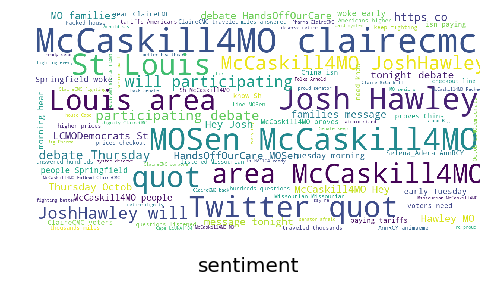

In [11]:
#Wordcloud on unclean data       
#category 0
show_wordcloud(cluster['tweet'][0], title ="sentiment")    
    

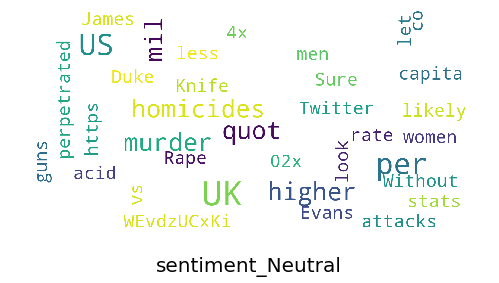

In [12]:
#Wordcloud on cleaned data      
#category 0
show_wordcloud(cluster1['tweet'][0], title ="sentiment_Neutral")    
    

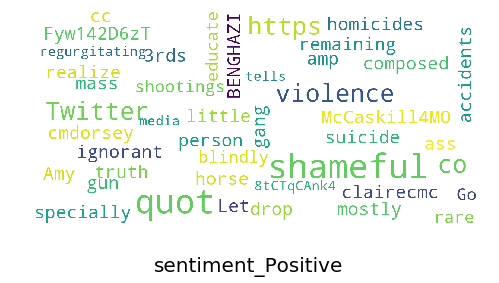

In [13]:
show_wordcloud(cluster1['tweet'][1], title ="sentiment_Positive")    
    

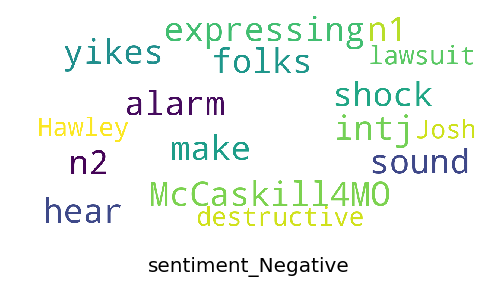

In [14]:
show_wordcloud(cluster1['tweet'][2], title ="sentiment_Negative")    
    

In [15]:
df1["sentiment_category"].unique()

array(['positive', 'neutral', 'negative'], dtype=object)